In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\syuhe\\Downloads\\prepared_cm-item-cm101 2.csv\\prepared_cm-item-cm101 2.csv", dtype=str, encoding='cp932')
df = df.loc[:, 'note':'price_remarks']
df.head()

,note,ownerIdentifier,subMaterialIdentifier,name,label,identifier,creator,dcterms:publisher,jpno,ndc,...,originalWorkCreator,contributor,alternativeHeadline,ma:materialIdentifier,dcterms:creator,schema:publisher,price_int,price_tax_info,price_tax_included,price_remarks
0,1977/12/1,2,1,国立国会図書館,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,390,FALSE,NaN,NaN
1,2012/9/1,2,1,国立国会図書館,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,648,FALSE,NaN,NaN
2,2009/10/1,2,1,国立国会図書館,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,900,TRUE,FALSE,NaN
3,2006/8/1,2,1,国立国会図書館,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,476,TRUE,FALSE,NaN
4,2004/4/1,2,1,国立国会図書館,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,660,TRUE,FALSE,NaN


In [4]:
#外れ値の検討
df['price_int'] = df['price_int'].astype(float)
df_over = df[df['price_int']>1000]
df_over['price_int'].count()
#10000円以上の価格のものは価格が破格なので外れ値とする。

21749

In [6]:
df1=df
df1.dropna(subset=['inLanguage'], inplace=True)
# 「日本語」を含む行と含まない行でカウント
contains_japanese = df1['inLanguage'].str.contains('日本語')
count_contains_japanese = contains_japanese.sum()
count_does_not_contain_japanese = len(df1) - count_contains_japanese

print(f'「日本語」を含む行の数: {count_contains_japanese}')
print(f'「日本語」を含まない行の数: {count_does_not_contain_japanese}')

「日本語」を含む行の数: 44061
「日本語」を含まない行の数: 15


In [7]:
df2=df
df2.dropna(subset=['location'], inplace=True)
# 「日本語」を含む行と含まない行でカウント
contains_japanese = df2['location'].str.contains('東京')
count_contains_japanese = contains_japanese.sum()
count_does_not_contain_japanese = len(df2) - count_contains_japanese

print(f'「東京」を含む行の数: {count_contains_japanese}')
print(f'「東京」を含まない行の数: {count_does_not_contain_japanese}')

「東京」を含む行の数: 43319
「東京」を含まない行の数: 558


In [8]:
# すべての情報を表示する
pd.set_option('display.max_info_columns', df.shape[1])  # 列数を指定
pd.set_option('display.max_info_rows', df.shape[0])  # 行数を指定

# DataFrameの情報を表示
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43877 entries, 92673 to 385824
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   note                   34302 non-null  object 
 1   ownerIdentifier        0 non-null      object 
 2   subMaterialIdentifier  0 non-null      object 
 3   name                   43877 non-null  object 
 4   label                  43876 non-null  object 
 5   identifier             43877 non-null  object 
 6   creator                41895 non-null  object 
 7   dcterms:publisher      6487 non-null   object 
 8   jpno                   42146 non-null  object 
 9   ndc                    41274 non-null  object 
 10  brand                  41793 non-null  object 
 11  schema:creator         25574 non-null  object 
 12  datePublished          43276 non-null  object 
 13  inLanguage             43877 non-null  object 
 14  isPartOf               26048 non-null  object 
 15  is

In [9]:
df2.dropna(subset=['price_int'], inplace=True)
# 'price_int'列をfloat型に変換
df2['price_int'] = df2['price_int'].astype(float)

df2['contains_initial'] = df2['location'].str.contains('東京', na=False)
# 含まれている行と含まれていない行に分割
df_contains_initial = df2[df2['contains_initial']]
df_not_contains_initial = df2[~df2['contains_initial']]
# NaNを含む行を削除する
df_cleaned1 = df_contains_initial.dropna(subset=['contains_initial'])
df_cleaned2 = df_not_contains_initial.dropna(subset=['contains_initial'])
df_cleaned2 = df_cleaned2.dropna(subset=['price_int'])

df_cleaned1['price_int'] = df_cleaned1['price_int'].astype(int)
df_cleaned2['price_int'] = df_cleaned2['price_int'].astype(int)


# 含まれている行のprice列の平均を計算
average_price_contains_initial = df_cleaned1['price_int'].mean()
average_price_not_contains_initial = df_cleaned2['price_int'].mean()
print("含まれている行のprice列の平均値:", str(average_price_contains_initial))
print("含まれていない行のprice列の平均値:", str(average_price_not_contains_initial))

含まれている行のprice列の平均値: 662.0751148775025
含まれていない行のprice列の平均値: 755.0923913043479


In [10]:
from scipy.stats import ranksums

# ウィルコクソンの順位和検定を実行
statistic, p_value = ranksums(df_cleaned1['price_int'], df_cleaned2['price_int'])

# 結果を表示
print("Wilcoxon Rank Sum Test:")
print(f"Statistic: {statistic}, p-value: {p_value}")

# p値を基に結果を判定
alpha = 0.05
if p_value < alpha:
    print("群間に統計的に有意な差があると判定されます")
else:
    print("群間に統計的に有意な差がないと判定されます")

Wilcoxon Rank Sum Test:
Statistic: -4.130132461661876, p-value: 3.6255427939667736e-05
群間に統計的に有意な差があると判定されます


In [11]:
# 'version'列の欠損値の数をカウント
missing_count = df['version'].isnull().sum()

# 'version'列の欠損値でない値の数をカウント
non_missing_count = df['version'].notnull().sum()

print("欠損値の数:", missing_count)
print("欠損値でない値の数:", non_missing_count)

欠損値の数: 42723
欠損値でない値の数: 1136


In [12]:
# 'price_int'列をfloat型に変換
df['price_int'] = df['price_int'].astype(float)

# 欠損値とそうでない値で行を分けて、それぞれの平均を求める
mean_with_nan = df[df['version'].isna()]['price_int'].mean()
mean_without_nan = df[df['version'].notna()]['price_int'].mean()

print("欠損値を含む行の平均:", mean_with_nan)
print("欠損値を含まない行の平均:", mean_without_nan)

欠損値を含む行の平均: 648.0093392317955
欠損値を含まない行の平均: 1236.2632042253522


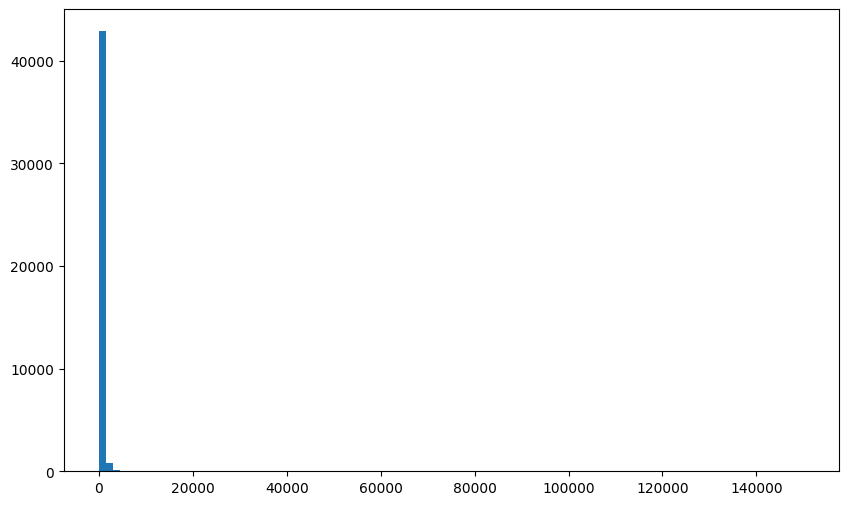

In [13]:
#訓練データ関して
plt.figure(figsize=(10, 6))
plt.hist(df['price_int'],bins=100)
plt.show()

In [14]:
#外れ値の検討
train_over = df[df['price_int']>5000]
train_over['price_int'].count()

50

In [15]:
# 'name'列の値が「国立国会図書館」である行をフィルタリングし、その数をカウント
national_library_count = (df['name'] == '国立国会図書館').sum()

# 'name'列の値が「国立国会図書館」でない行をフィルタリングし、その数をカウント
non_national_library_count = (df['name'] != '国立国会図書館').sum()

print("国立国会図書館の数:", national_library_count)
print("それ以外の数:", non_national_library_count)

国立国会図書館の数: 0
それ以外の数: 43859


In [16]:
df['price_int'] = df['price_int'].astype(float)

# name列が「国立国会図書館」かどうかを判定し、結果をブール値で持つ新しい列を追加
df['is_national_library'] = df['name'] == '国立国会図書館'

# is_national_library列の値に基づいてprice_int列の平均を計算
avg_price_national_library = df[df['is_national_library']]['price_int'].mean()
avg_price_other = df[~df['is_national_library']]['price_int'].mean()

print("国立国会図書館の場合の平均価格:", avg_price_national_library)
print("その他の場合の平均価格:", avg_price_other)

国立国会図書館の場合の平均価格: nan
その他の場合の平均価格: 663.2458104379945


In [17]:
# name列ごとの出現回数を計算
name_counts = df['name'].value_counts()

# 出現回数が1000以上のnameを取得
valid_names = name_counts[name_counts >= 1000].index

# 条件を満たすnameごとにprice_int列の平均を計算
average_prices = {}
for name in valid_names:
    avg_price = df[df['name'] == name]['price_int'].mean()
    average_prices[name] = avg_price

# 結果を表示
for name, avg_price in average_prices.items():
    print(f"{name}: 平均価格 = {avg_price}")

In [18]:
# 'note'列に特定の文字列を含む行の数をカウント
contains_count = df[df['note'].str.contains('NDC（9版）はNDC（10版）を自動変換した値である', na=False)].shape[0]

# 'note'列に特定の文字列を含まない行の数をカウント
not_contains_count = df[~df['note'].str.contains('NDC（9版）はNDC（10版）を自動変換した値である', na=False)].shape[0]

print("特定の文字列を含む行の数:", contains_count)
print("特定の文字列を含まない行の数:", not_contains_count)

特定の文字列を含む行の数: 32816
特定の文字列を含まない行の数: 11043
